LSTMモデルの構築と予測を実行し、グラフを出力する。

c:\Users\houbo\stock-price-predictor\notebooks\../utils\processing_lstm2.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col]=df[col].fillna(method="ffill")
c:\Users\houbo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - loss: 0.0056
Epoch 2/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.0010
Epoch 3/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 9.1825e-04
Epoch 4/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 8.9919e-04
Epoch 5/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 8.5302e-04
Epoch 6/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - loss: 8.7576e-04
Epoch 7/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 7.8968e-04
Epoch 8/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - loss: 6.5497e-04
Epoch 9/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - loss: 6.1311e-04
Epoch 10/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - loss: 6.3378e-04
Epoch 11/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 6.1257e-04
Epoch 12/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - loss: 5.4002e-04
Epoch 13/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - loss: 4.9349e-04
Epoch 14/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\houbo\stock-price-predictor\notebooks\../models\lstm_model2.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_pred
C:\Users\houbo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\houbo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


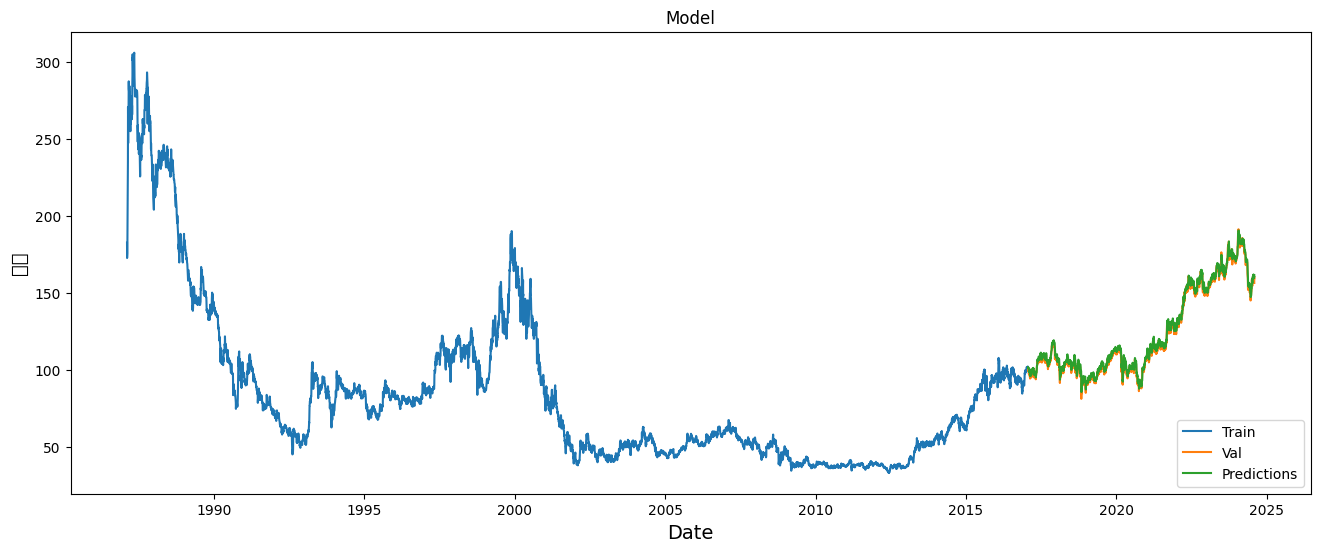

In [1]:
import sys
sys.path.append("../utils")
sys.path.append("../models")

from processing_lstm2 import create_data
from lstm_model2 import LSTM2_build, train_model, predict_and_inverse, plot_predictions

df, sclr, x_train, y_train, x_test, y_test, training_data_len=create_data(r"C:\Users\houbo\stock-price-predictor\notebooks\data\stock_price.csv",col="終値",window=60)

model=LSTM2_build(x_train)
history=train_model(model,x_train,y_train,batch_size=32,epochs=100)

y_pred=predict_and_inverse(model,x_test,sclr)

plot_predictions(df, training_data_len,y_pred)

二乗平均平方根誤差RMSEと決定係数により予測値と実際の値のずれを評価する。

In [2]:
import numpy as np
from sklearn.metrics import r2_score
y_true = df[training_data_len:]
rmse=np.sqrt(np.mean((y_pred-y_true)**2))
print(rmse)
r2=r2_score(y_true,y_pred)
print(r2)

2.0589180715249484
0.9947301745414734
